<font size="+3"><b> <center><u>Real Time Face Mask Detection</u></center></b></font>

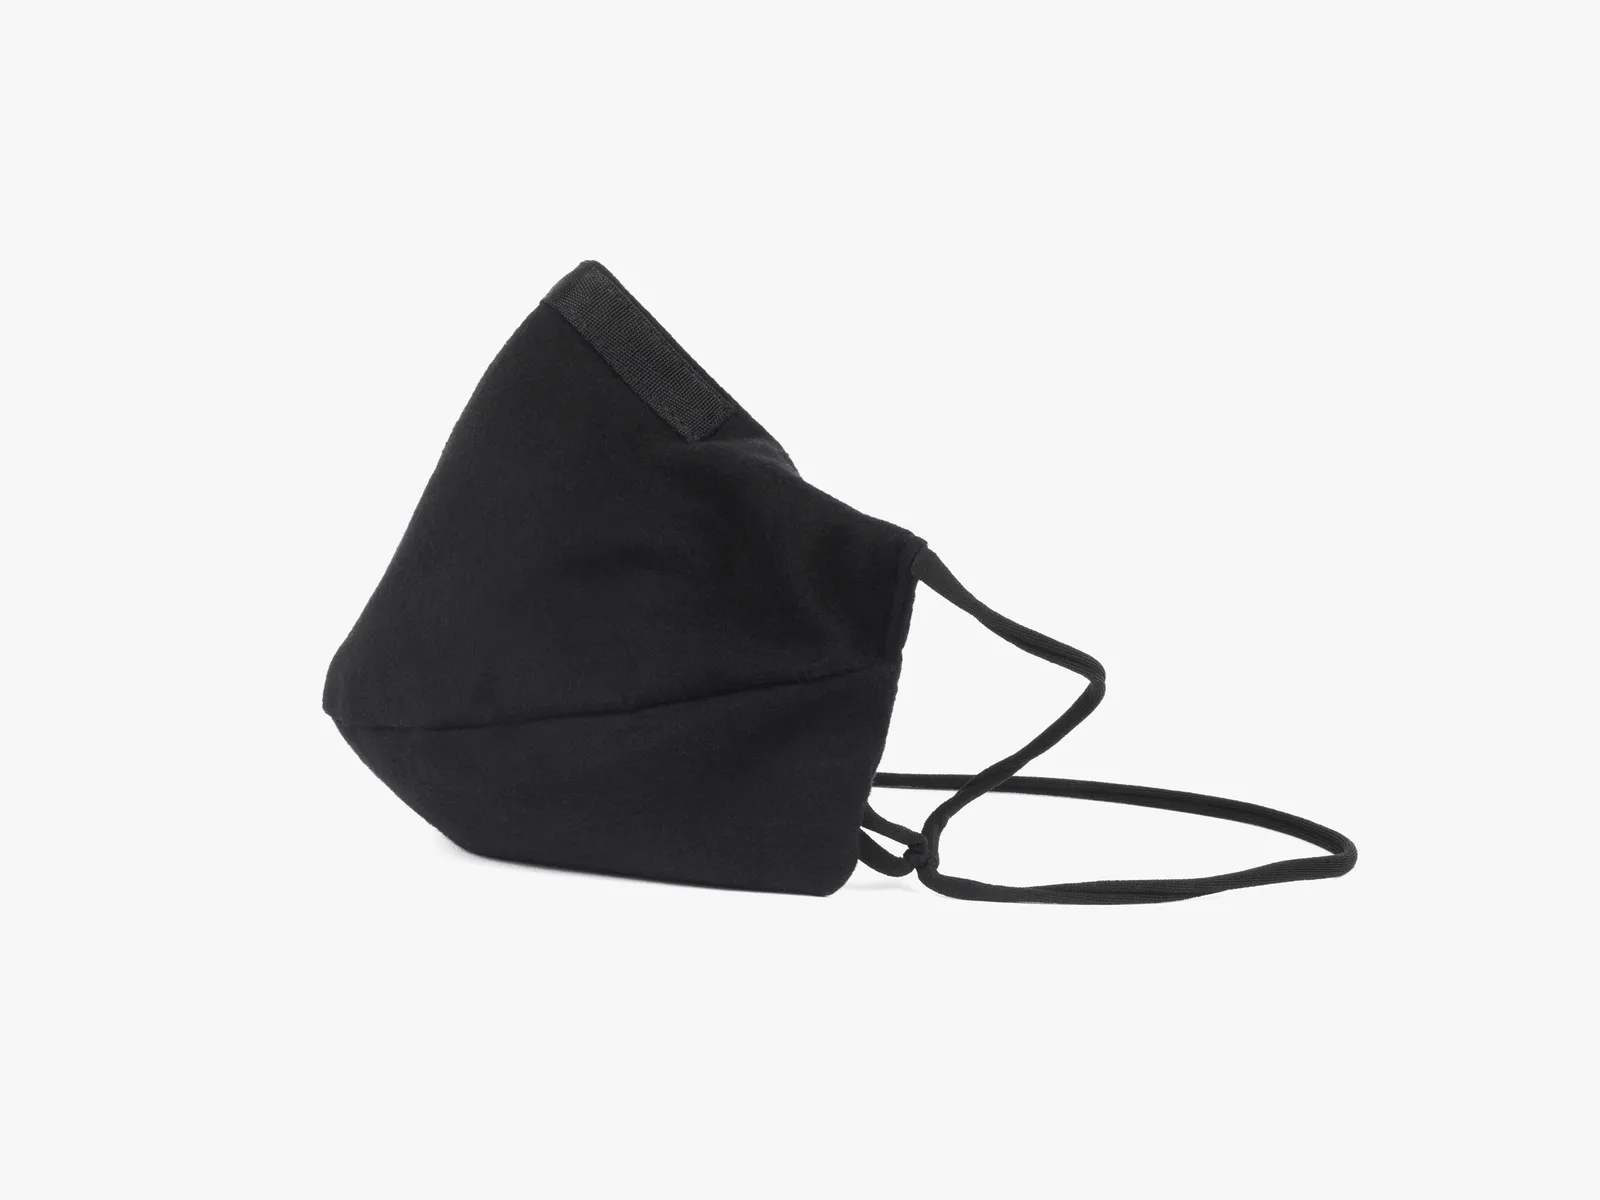

<a id="5"></a>
<font size=+2.5><b>Import Libraries</b></font>

In [10]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

<a id="6"></a>
<font size=+2.5><b>Setting up the path for training data</b></font>

In [11]:
x  = "../input/face-mask-dataset/data"
path = Path(x)
path.ls()

[PosixPath('../input/face-mask-dataset/data/without_mask'),
 PosixPath('../input/face-mask-dataset/data/with_mask')]

<a id="7"></a>
<font size=+2.5><b>Loading dataset for training</b></font>
<br/>

In [12]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

<a id="8"></a>
<font size=+2.5><b>Data Exploration</b></font>
<br/>

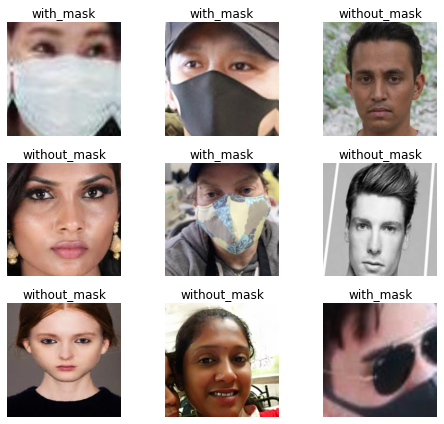

In [13]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)


<a id="9"></a>
<font size=+2.5><b>Print data classes</b></font>
<br/>

In [14]:
print(data.classes)
len(data.classes)
data.c

['with_mask', 'without_mask']


2

In [19]:
data

ImageDataBunch;

Train: LabelList (6043 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
without_mask,without_mask,without_mask,without_mask,without_mask
Path: ../input/face-mask-dataset/data;

Valid: LabelList (1510 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
without_mask,with_mask,with_mask,without_mask,with_mask
Path: ../input/face-mask-dataset/data;

Test: None

<a id="10"></a>
<font size=+2.5><b>Create the ResNet50 model</b></font>
<br/>

In [20]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

<a id="11"></a>
<font size=+2.5><b>Find LR</b></font>
<br/>

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


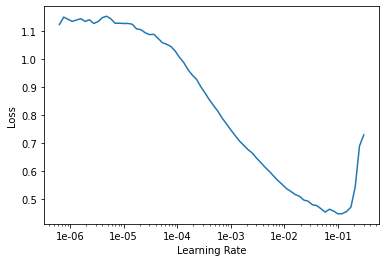

In [21]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

<a id="12"></a>
<font size=+2.5><b>Train the model</b></font>
<br/>

In [22]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.357700,3.775547,0.816556,01:20
1,0.483793,0.005703,0.998013,01:17
2,0.168354,0.010140,0.998013,01:18
3,0.070705,0.000221,1.000000,01:18


<a id="13"></a>
<font size=+2.5><b> Hyper Parameter Tuning</b></font>
<br/>

In [23]:
learn.unfreeze()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.061185,0.010448,0.998013,01:21
1,0.097035,0.030514,0.994702,01:20
2,0.081631,5.045841,0.992715,01:20
3,0.054205,0.000490,1.000000,01:21
4,0.043009,0.009588,0.996027,01:21
5,0.035270,0.007775,0.994702,01:19
6,0.030111,0.004553,0.997351,01:20
7,0.021968,0.001410,0.999338,01:21
8,0.017909,0.000892,0.999338,01:20
9,0.009945,0.000843,1.000000,01:21


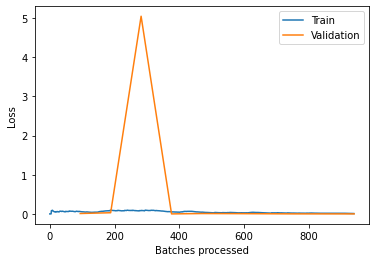

In [24]:
learn.recorder.plot_losses()

<a id="14"></a>
<font size=+2.5><b> Interpret the results</b></font>
<br/>

Model performance can be validated in different ways. One of the popular methods is using the confusion matrix. Diagonal values of the matrix indicate correct predictions for each class, whereas other cell values indicate a number of wrong predictions.

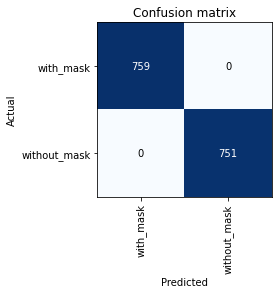

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

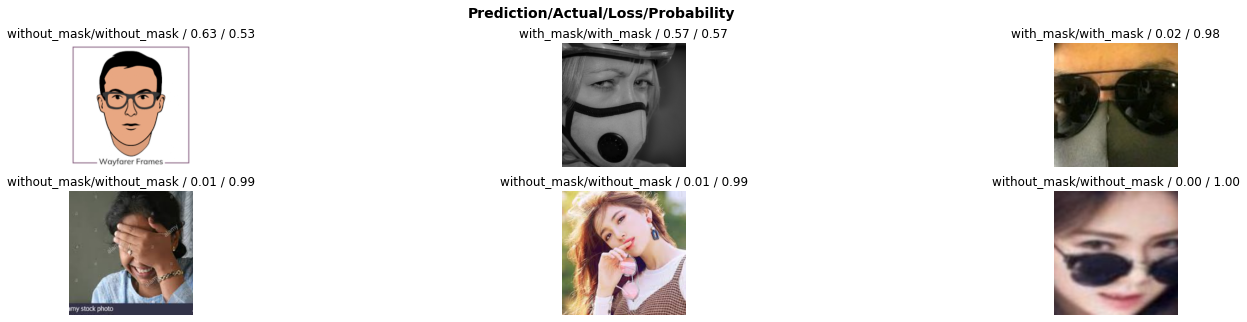

In [26]:
interp.plot_top_losses(6,figsize = (25,5))

<a id="16"></a>
<font size=+2.5><b>Save and Load the model</b></font>
<br/>


In [27]:
learn.export(file = Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

PosixPath('/kaggle/working/stage-1.pth')